In [1]:
#importing basic useful libraries to load and visualise dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_test=pd.read_csv('/content/test.csv')
df_train=pd.read_csv('/content/train.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    52310 non-null  int64  
 1   Agency                52310 non-null  object 
 2   Agency Type           52310 non-null  object 
 3   Distribution Channel  52310 non-null  object 
 4   Product Name          52310 non-null  object 
 5   Duration              52310 non-null  int64  
 6   Destination           52310 non-null  object 
 7   Net Sales             52310 non-null  float64
 8   Commision (in value)  52310 non-null  float64
 9   Age                   52310 non-null  int64  
 10  Claim                 52310 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB


In [4]:
df_train.shape

(52310, 11)

In [5]:
df_test.shape

(22421, 10)

In [6]:
df_train = df_train.rename({'Commision (in value)' : 'Comission'}, axis = 'columns')
df_test = df_test.rename({'Commision (in value)' : 'Comission'}, axis = 'columns')
df_train = df_train.rename({'Net Sales' : 'Net_Sales'}, axis = 'columns')
df_test = df_test.rename({'Net Sales' : 'Net_Sales'}, axis = 'columns')
df_train = df_train.rename({'Product Name' : 'Product'}, axis = 'columns')
df_test = df_test.rename({'Product Name' : 'Product'}, axis = 'columns')
df_train = df_train.rename({'Distribution Channel' : 'Channel'}, axis = 'columns')
df_test = df_test.rename({'Distribution Channel' : 'Channel'}, axis = 'columns')

In [7]:
df_train[df_train['Duration'] > 550]

,ID,Agency,Agency Type,Channel,Product,Duration,Destination,Net_Sales,Comission,Age,Claim
382,9512,SSI,Airlines,Online,Ticket Protector,4736,SINGAPORE,0.32,0.09,48,0
2609,4476,C2B,Airlines,Online,Annual Silver Plan,740,SINGAPORE,0.00,54.19,36,0
7766,4113,SSI,Airlines,Online,Ticket Protector,4831,SINGAPORE,0.32,0.09,48,0
14544,3927,SSI,Airlines,Online,Ticket Protector,4847,SINGAPORE,0.32,0.09,48,0
22123,3165,SSI,Airlines,Online,Ticket Protector,4844,SINGAPORE,0.32,0.09,48,0
31985,5697,SSI,Airlines,Online,Ticket Protector,4815,SINGAPORE,0.32,0.09,48,0
33701,6734,SSI,Airlines,Online,Ticket Protector,4580,SINGAPORE,0.32,0.09,48,0
43158,5331,SSI,Airlines,Online,Ticket Protector,4609,SINGAPORE,0.32,0.09,48,0
47791,3123,SSI,Airlines,Online,Ticket Protector,4881,SINGAPORE,0.13,0.04,48,0
48880,4682,SSI,Airlines,Online,Ticket Protector,4784,SINGAPORE,0.32,0.09,48,0


In [8]:
df_train.drop(df_train[df_train['Duration'] > 550].index,inplace= True)
df_train.drop(df_train[df_train['Duration'] < 0].index,inplace= True)
df_train.drop(df_train[df_train['Age'] <= 0].index,inplace= True)



In [9]:
df_train['Net_Sales'] = df_train['Net_Sales'].apply(lambda x: x*-1 if x<0 else x)

In [10]:
df_train.loc[df_train['Net_Sales']==0,'Comission']=0

In [11]:
df_train.drop(df_train[df_train['Age'] <= 0].index,inplace= True)

In [12]:
df_train.describe()


,ID,Duration,Net_Sales,Comission,Age,Claim
count,52294.000000,52294.000000,52294.000000,52294.000000,52294.000000,52294.000000
mean,6005.809634,57.435404,49.698373,11.722897,39.549853,0.166750
std,2306.510910,89.905037,59.272792,22.598065,13.744837,0.372756
min,2000.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4015.000000,10.000000,20.000000,0.000000,33.000000,0.000000
50%,6002.000000,24.000000,29.700000,0.000000,36.000000,0.000000
75%,8004.000000,57.000000,56.411069,12.400000,43.000000,0.000000
max,10000.000000,547.000000,682.000000,262.760000,118.000000,1.000000


In [13]:
df_train.head()

,ID,Agency,Agency Type,Channel,Product,Duration,Destination,Net_Sales,Comission,Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [14]:
df_train.isnull().sum()

ID             0
Agency         0
Agency Type    0
Channel        0
Product        0
Duration       0
Destination    0
Net_Sales      0
Comission      0
Age            0
Claim          0
dtype: int64

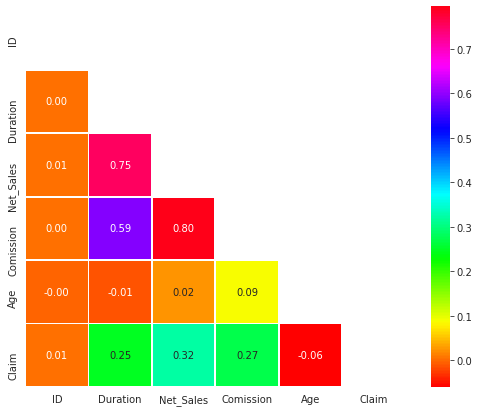

In [15]:
corr = df_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr,mask=mask,square=True,annot=True,fmt='0.2f',linewidths=.8,cmap="hsv")

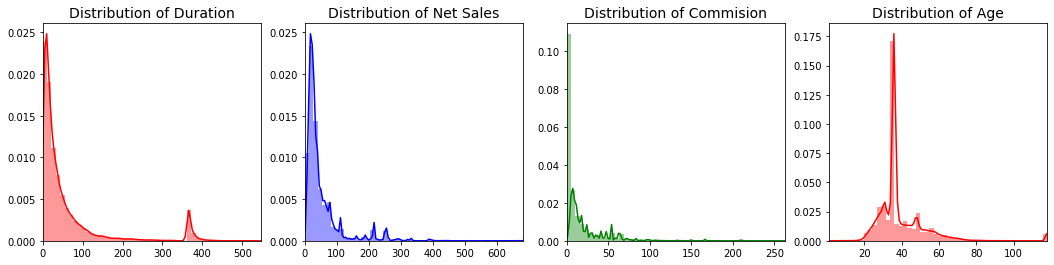

In [16]:
fig, ax = plt.subplots(1, 4, figsize=(18,4))

dur_val = df_train['Duration'].values
sales_val = df_train['Net_Sales'].values
commision_val=df_train['Comission'].values
age_val=df_train['Age'].values

sns.distplot(dur_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Duration', fontsize=14)
ax[0].set_xlim([min(dur_val), max(dur_val)])

sns.distplot(sales_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Net Sales', fontsize=14)
ax[1].set_xlim([min(sales_val), max(sales_val)])


sns.distplot(commision_val, ax=ax[2], color='g')
ax[2].set_title('Distribution of Commision', fontsize=14)
ax[2].set_xlim([min(commision_val), max(commision_val)])

sns.distplot(age_val, ax=ax[3], color='r')
ax[3].set_title('Distribution of Age', fontsize=14)
ax[3].set_xlim([min(age_val), max(age_val)])


plt.show()

In [17]:
df_train.head()

,ID,Agency,Agency Type,Channel,Product,Duration,Destination,Net_Sales,Comission,Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [18]:
# Categorical boolean mask
categorical_feature_mask =df_train.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df_train.columns[categorical_feature_mask].tolist()
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
df_train[categorical_cols] = df_train[categorical_cols].apply(lambda col: le.fit_transform(col))
df_train[categorical_cols].head(10)

,Agency,Agency Type,Channel,Product,Destination
0,7,1,1,10,68
1,7,1,1,10,53
2,6,1,1,16,84
3,7,1,1,1,33
4,7,1,1,1,53
5,7,1,1,1,84
6,7,1,1,10,90
7,9,0,1,8,95
8,7,1,1,1,16
9,2,0,1,9,75


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [20]:
X = df_train.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,ID,7.372322
1,Agency,8.717609
2,Agency Type,3.968761
3,Channel,18.562833
4,Product,4.222189
5,Duration,3.376309
6,Destination,5.261348
7,Net_Sales,7.998890
8,Comission,4.343365
9,Age,9.309898


In [21]:
df_train1 =df_train.drop(columns=['ID','Channel','Agency Type','Comission'])


In [22]:
Y = df_train1.iloc[:,:-1]
calc_vif(Y)

,variables,VIF
0,Agency,5.197346
1,Product,3.198442
2,Duration,3.332945
3,Destination,3.911633
4,Net_Sales,4.042153
5,Age,7.931309


In [23]:
df_train2=df_train.drop(columns=['ID','Channel','Agency Type','Comission'])
X=df_train2.drop(columns=['Claim'])
y=df_train2['Claim']

In [24]:
from imblearn.over_sampling import RandomOverSampler

ors=RandomOverSampler(ratio=1)
X_train_res,y_train_res=ors.fit_sample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [25]:
X_train_res.shape,y_train_res.shape

((87148, 6), (87148,))

In [26]:
from collections import Counter
print('original dataset shape {}'.format(Counter(y)))
print('resampled dataset shape {}'.format(Counter(y_train_res)))

original dataset shape Counter({0: 43574, 1: 8720})
resampled dataset shape Counter({0: 43574, 1: 43574})


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X_train_res,y_train_res,test_size=0.30,random_state=101)

In [29]:
#Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

In [30]:
#Automating the accuracy scores by defining a function
def CrossVal(dataX,dataY,mode,cv=3):
    score=cross_val_score(mode,dataX , dataY, cv=cv, scoring='accuracy')
    return(np.mean(score))

In [31]:
#Automating Precision curve, AUC, ROC under a function
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')



Accuracy is :  0.734094966167293


Text(0.5, 1.0, 'F1 Score = 0.7211860353897658')

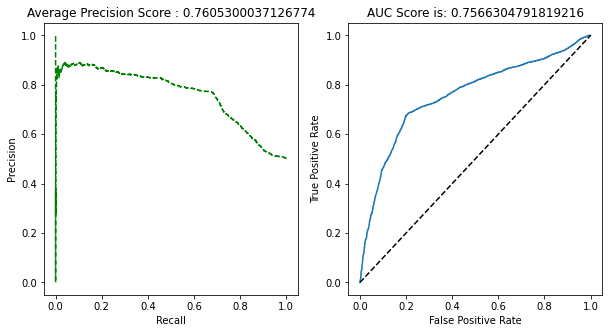

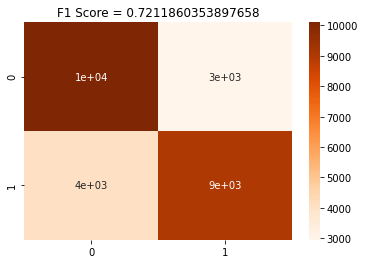

In [39]:
sgd=SGDClassifier(tol=1e-10, random_state=23,loss='log', penalty= "l2", alpha=0.2)
score_sgd=CrossVal(X_train,y_train,sgd)
print("Accuracy is : ",score_sgd)
sgd.fit(X_train,y_train)
plotting(y_test,sgd.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,sgd.predict(X_test)), annot= True, cmap='Oranges')
sgd_f1=f1_score(y_test,sgd.predict(X_test))
plt.title('F1 Score = {}'.format(sgd_f1))

In [52]:
predictions_sgd = sgd.predict(X_test) 
print(classification_report(y_test, predictions_sgd))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74     13052
           1       0.75      0.69      0.72     13093

    accuracy                           0.73     26145
   macro avg       0.73      0.73      0.73     26145
weighted avg       0.73      0.73      0.73     26145



Accuracy is :  0.8513351640342934


Text(0.5, 1.0, 'F1 Score = 0.8800876201243641')

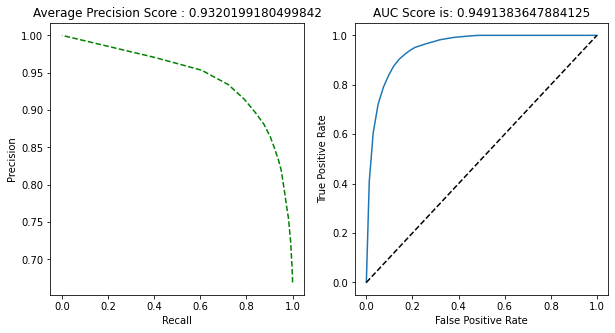

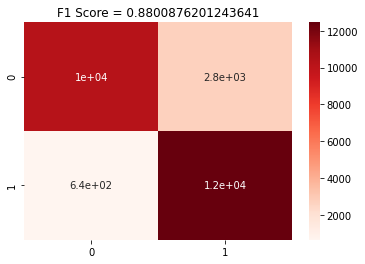

In [40]:
k=KNeighborsClassifier(n_neighbors=20, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
score_k=CrossVal(X_train,y_train,k)
print("Accuracy is : ",score_k)
k.fit(X_train,y_train)
plotting(y_test,k.predict_proba(X_test))


fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,k.predict(X_test)), annot= True, cmap='Reds')
k_f1=f1_score(y_test,k.predict(X_test))
plt.title('F1 Score = {}'.format(k_f1))

Accuracy is :  0.7452256270370864


Text(0.5, 1.0, 'F1 Score = 0.7283006589115757')

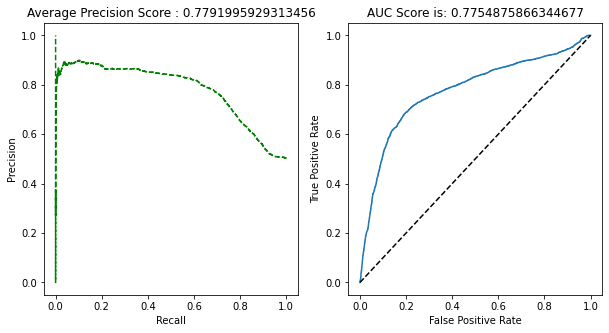

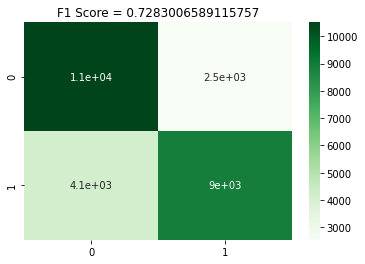

In [41]:
lr=LogisticRegression(penalty='l2',dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
score_lr=CrossVal(X_train,y_train,lr)
print("Accuracy is : ",score_lr)
lr.fit(X_train,y_train)
plotting(y_test,lr.predict_proba(X_test))


fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,lr.predict(X_test)), annot= True, cmap='Greens')
lr_f1=f1_score(y_test,lr.predict(X_test))
plt.title('F1 Score = {}'.format(lr_f1))

Accuracy is :  0.9503958582275137


Text(0.5, 1.0, 'F1 Score = 0.9644318773718283')

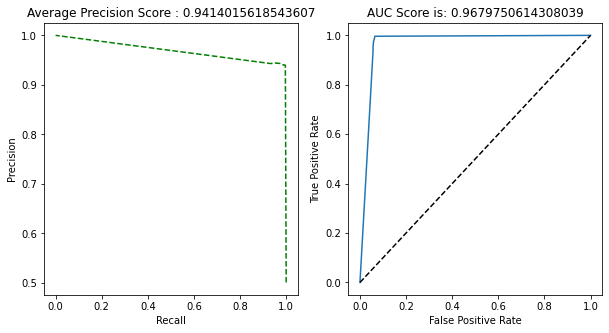

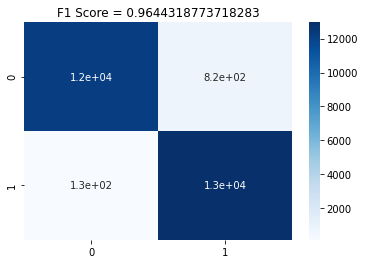

In [42]:
dtc=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=3, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
score_dtc=CrossVal(X_train,y_train,dtc)
print("Accuracy is : ",score_dtc)
dtc.fit(X_train,y_train)
plotting(y_test,dtc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,dtc.predict(X_test)), annot= True, cmap='Blues')

dtc_f1=f1_score(y_test,dtc.predict(X_test))
plt.title('F1 Score = {}'.format(dtc_f1))

Accuracy is: 0.8107306304524297


Text(0.5, 1.0, 'F1 Score = 0.809574630279006')

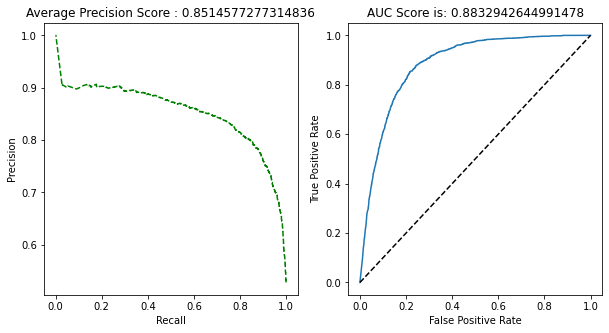

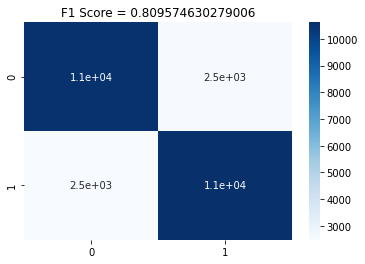

In [43]:
gbc=GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
score_gbc= CrossVal(X_train,y_train,gbc)
print('Accuracy is:',score_gbc)
gbc.fit(X_train,y_train)
plotting(y_test,gbc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,gbc.predict(X_test)), annot= True, cmap='Blues')

gbc_f1=f1_score(y_test,gbc.predict(X_test))
plt.title('F1 Score = {}'.format(gbc_f1))

Accuracy is: 0.8107306304524297


Text(0.5, 1.0, 'F1 Score = 0.9712471994025393')

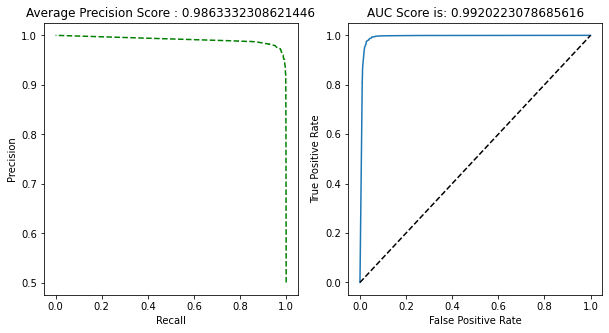

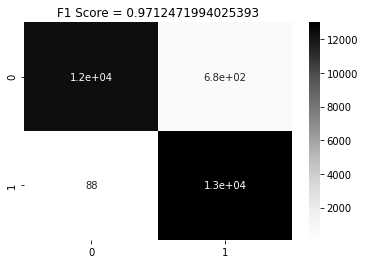

In [44]:
bc=BaggingClassifier(base_estimator=dtc, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
score_bc= CrossVal(X_train,y_train,gbc)
print('Accuracy is:',score_bc)
bc.fit(X_train,y_train)
plotting(y_test,bc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,bc.predict(X_test)), annot= True, cmap='Greys')

bc_f1=f1_score(y_test,bc.predict(X_test))
plt.title('F1 Score = {}'.format(bc_f1))

Accuracy is: 0.8047308868218269


Text(0.5, 1.0, 'F1 Score = 0.8182763000885331')

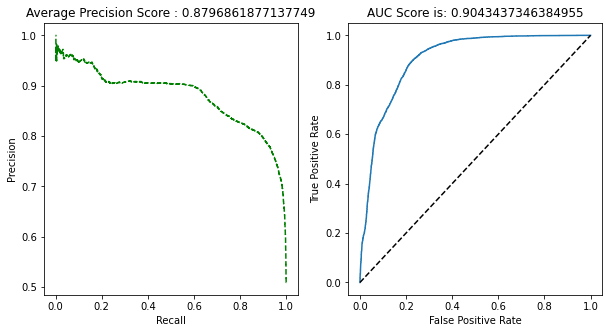

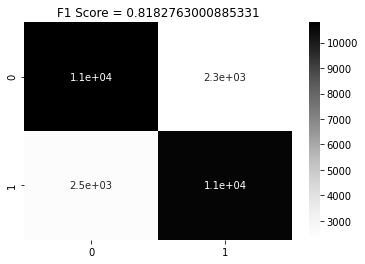

In [45]:
vc=VotingClassifier(estimators=[('knn',k),('lr',lr),('SGD',sgd),],
                    voting='soft')
score_vc= CrossVal(X_train,y_train,vc)
print('Accuracy is:',score_vc)
vc.fit(X_train,y_train)
plotting(y_test,vc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,vc.predict(X_test)), annot= True, cmap='Greys')

vc_f1=f1_score(y_test,vc.predict(X_test))
plt.title('F1 Score = {}'.format(vc_f1))

Learning rate set to 0.050129
0:	learn: 0.6727300	total: 68.1ms	remaining: 1m 8s
1:	learn: 0.6545719	total: 86.7ms	remaining: 43.2s
2:	learn: 0.6366680	total: 105ms	remaining: 34.9s
3:	learn: 0.6227953	total: 123ms	remaining: 30.6s
4:	learn: 0.6084573	total: 145ms	remaining: 28.8s
5:	learn: 0.5952018	total: 168ms	remaining: 27.9s
6:	learn: 0.5837751	total: 187ms	remaining: 26.5s
7:	learn: 0.5722820	total: 210ms	remaining: 26s
8:	learn: 0.5626419	total: 229ms	remaining: 25.2s
9:	learn: 0.5537318	total: 250ms	remaining: 24.7s
10:	learn: 0.5456223	total: 268ms	remaining: 24.1s
11:	learn: 0.5395658	total: 287ms	remaining: 23.6s
12:	learn: 0.5327674	total: 305ms	remaining: 23.2s
13:	learn: 0.5267921	total: 324ms	remaining: 22.8s
14:	learn: 0.5216813	total: 343ms	remaining: 22.5s
15:	learn: 0.5166307	total: 361ms	remaining: 22.2s
16:	learn: 0.5125458	total: 380ms	remaining: 22s
17:	learn: 0.5089713	total: 399ms	remaining: 21.8s
18:	learn: 0.5049314	total: 423ms	remaining: 21.8s
19:	learn: 0.

Text(0.5, 1.0, 'F1 Score = 0.9221137911986743')

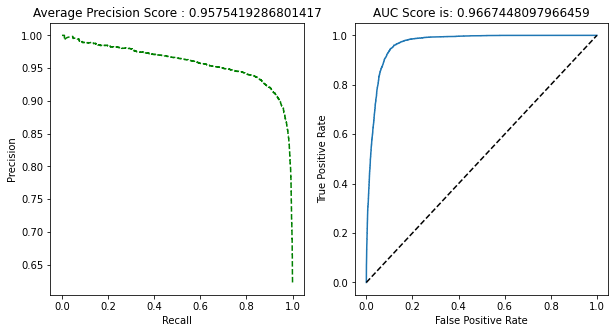

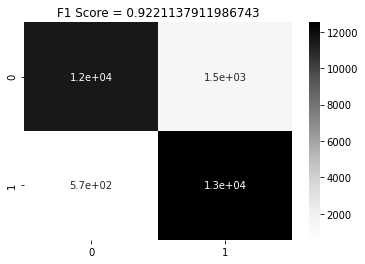

In [46]:
!pip install catboost
from catboost import CatBoostClassifier, Pool
cat=CatBoostClassifier()
score_cat= CrossVal(X_train,y_train,cat)
print('Accuracy is:',score_cat)
cat.fit(X_train,y_train)
plotting(y_test,cat.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,cat.predict(X_test)), annot= True, cmap='Greys')

cat_f1=f1_score(y_test,cat.predict(X_test))
plt.title('F1 Score = {}'.format(cat_f1))

Accuracy is: 0.937183420937228


Text(0.5, 1.0, 'F1 Score = 0.9523598165409085')

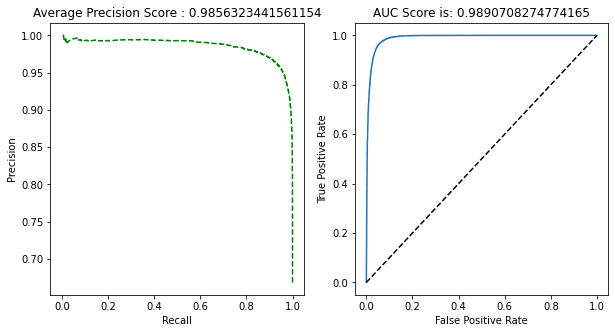

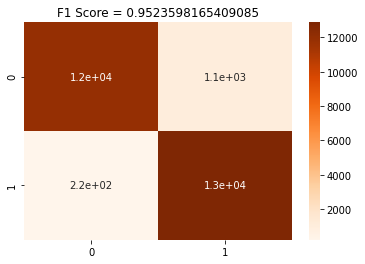

In [47]:
rf=RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=110, min_samples_split=8, min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
score_rf= CrossVal(X_train,y_train,rf)
print('Accuracy is:',score_rf)
rf.fit(X_train,y_train)
plotting(y_test,rf.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,rf.predict(X_test)), annot= True, cmap='Oranges')

rf_f1=f1_score(y_test,rf.predict(X_test))
plt.title('F1 Score = {}'.format(rf_f1))

Accuracy is: 0.9623297238872892


Text(0.5, 1.0, 'F1 Score = 0.9752208414433298')

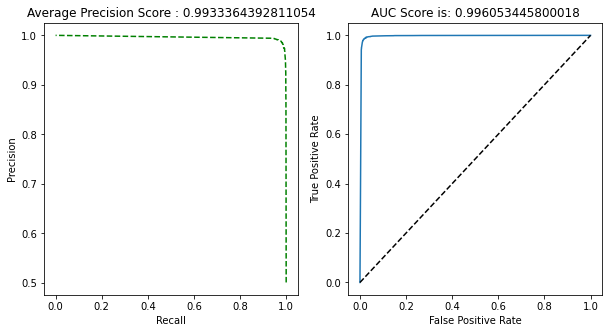

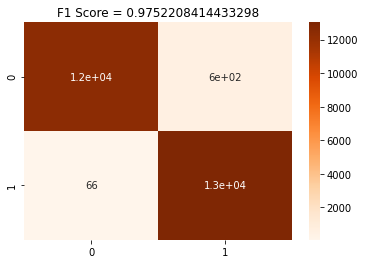

In [48]:
etc=ExtraTreesClassifier(bootstrap= False, ccp_alpha=0, class_weight= None, criterion= 'gini', max_depth= None, max_features='auto', min_impurity_decrease= 0.0, min_impurity_split= None, min_weight_fraction_leaf=0, n_estimators=100, n_jobs=-1, oob_score= False, random_state=123, verbose=0, warm_start=False)
score_etc= CrossVal(X_train,y_train,etc)
print('Accuracy is:',score_etc)
etc.fit(X_train,y_train)
plotting(y_test,etc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,etc.predict(X_test)), annot= True, cmap='Oranges')

etc_f1=f1_score(y_test,etc.predict(X_test))
plt.title('F1 Score = {}'.format(etc_f1))

Accuracy is: 0.8075504334559017


Text(0.5, 1.0, 'F1 Score = 0.8085624120755864')

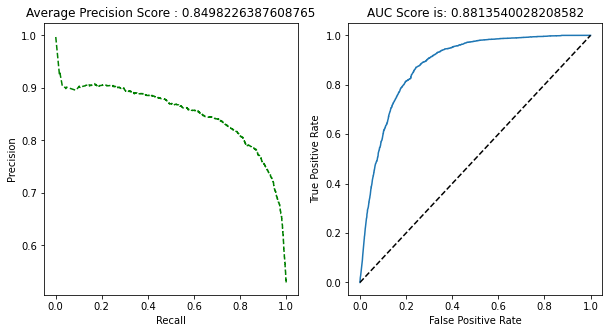

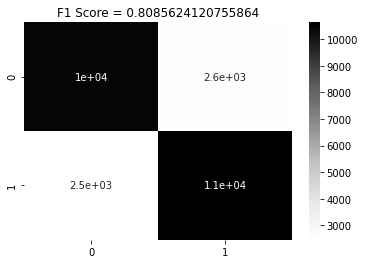

In [49]:
import xgboost as xgb
xb = xgb.XGBClassifier(base_estimator = RandomForestClassifier(), random_state=0)
score_xb= CrossVal(X_train,y_train,xb)
print('Accuracy is:',score_xb)
xb.fit(X_train,y_train)
plotting(y_test,xb.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,xb.predict(X_test)), annot= True, cmap='Greys')

xb_f1=f1_score(y_test,xb.predict(X_test))
plt.title('F1 Score = {}'.format(xb_f1))

Accuracy is: 0.9641984844410532


Text(0.5, 1.0, 'F1 Score = 0.9787250037588333')

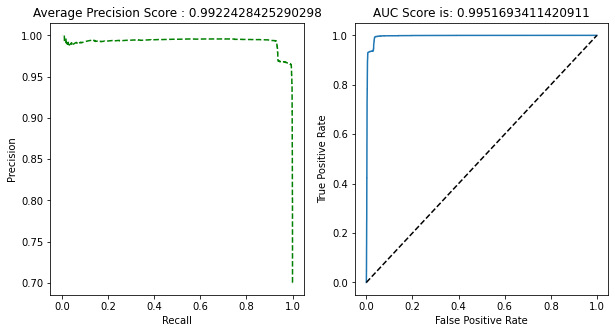

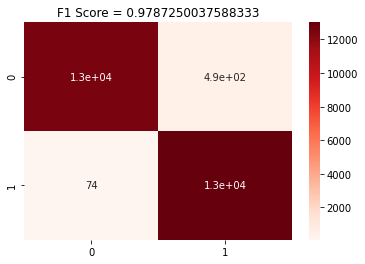

In [32]:
abc=AdaBoostClassifier(RandomForestClassifier(),n_estimators=100, random_state=343, learning_rate=1)
score_ada= CrossVal(X_train,y_train,abc)
print('Accuracy is:',score_ada)
abc.fit(X_train,y_train)
plotting(y_test,abc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,abc.predict(X_test)), annot= True, cmap='Reds')

abc_f1=f1_score(y_test,abc.predict(X_test))
plt.title('F1 Score = {}'.format(abc_f1))

Accuracy is: 0.9627395473221978


Text(0.5, 1.0, 'F1 Score = 0.9756006286954569')

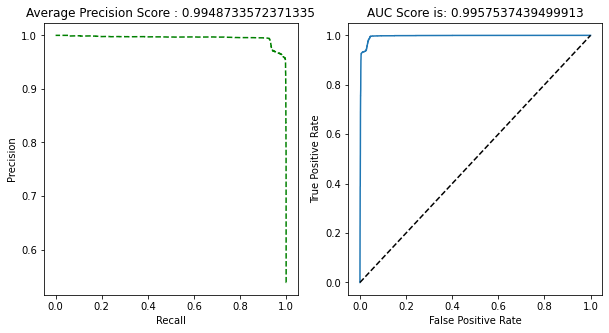

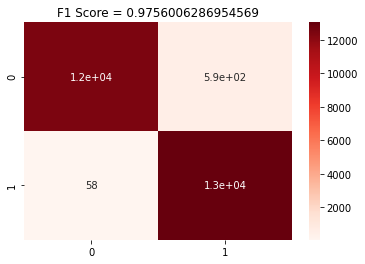

In [58]:
abc=AdaBoostClassifier(ExtraTreesClassifier(),n_estimators=100, random_state=343, learning_rate=1)
score_ada= CrossVal(X_train,y_train,abc)
print('Accuracy is:',score_ada)
abc.fit(X_train,y_train)
plotting(y_test,abc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,abc.predict(X_test)), annot= True, cmap='Reds')

abc_f1=f1_score(y_test,abc.predict(X_test))
plt.title('F1 Score = {}'.format(abc_f1))

Text(0.5, 1.0, 'Model Accracy')

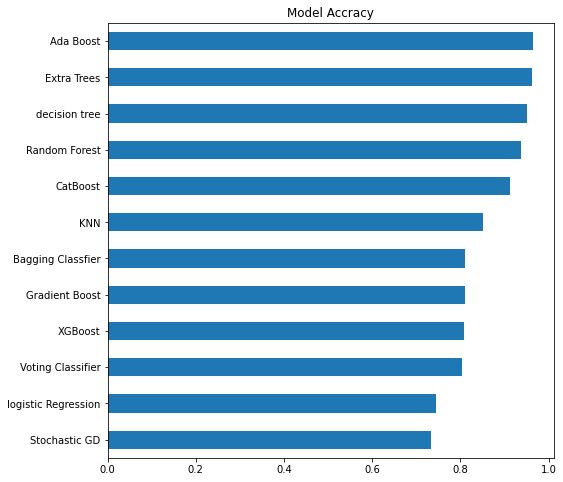

In [53]:
model_accuracy = pd.Series(data=[score_sgd, score_k, score_lr, score_dtc, score_rf, 
                           score_ada, score_gbc, score_bc, score_etc, score_cat, score_vc,score_xb], 
                           index=['Stochastic GD','KNN','logistic Regression','decision tree', 'Random Forest',
                             'Ada Boost' , 'Gradient Boost','Bagging Classfier','Extra Trees', 'CatBoost', 'Voting Classifier','XGBoost'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')

Text(0.5, 1.0, 'Model F1 Score Comparison')

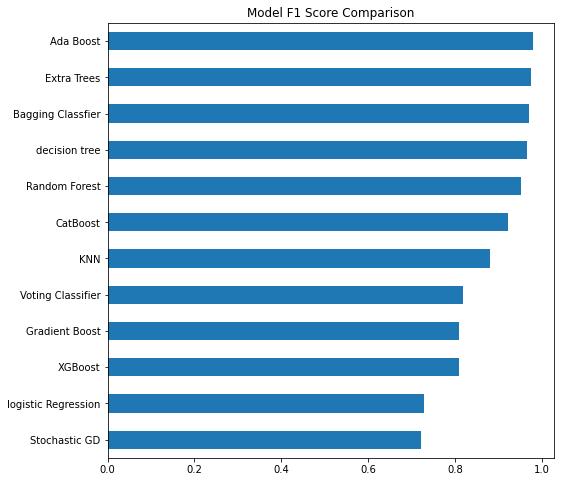

In [55]:
model_f1_score = pd.Series(data=[sgd_f1, k_f1, lr_f1, dtc_f1, rf_f1, 
                           abc_f1, gbc_f1, bc_f1, etc_f1, cat_f1, vc_f1,xb_f1], 
                           index=['Stochastic GD','KNN','logistic Regression','decision tree', 'Random Forest',
                                 'Ada Boost' , 'Gradient Boost', 'Bagging Classfier','Extra Trees','CatBoost','Voting Classifier','XGBoost'])
fig= plt.figure(figsize=(8,8))
model_f1_score.sort_values().plot.barh()
plt.title('Model F1 Score Comparison')

In [34]:
# Categorical boolean mask
categorical_feature_mask =df_test.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df_test.columns[categorical_feature_mask].tolist()
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
df_test[categorical_cols] = df_test[categorical_cols].apply(lambda col: le.fit_transform(col))
df_test[categorical_cols].head(10)

,Agency,Agency Type,Channel,Product,Destination
0,7,1,1,10,33
1,7,1,1,0,75
2,2,0,1,9,75
3,7,1,1,1,82
4,2,0,1,17,75
5,2,0,1,9,75
6,7,1,1,1,95
7,2,0,1,9,75
8,6,1,1,16,28
9,7,1,1,10,41


In [35]:
X1_test=df_test.drop(columns=['ID','Channel','Agency Type','Comission'])
pred = abc.predict(X1_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
df_test['Claim']=pd.DataFrame(pred)
df_test['Claim'].value_counts()

0    18736
1     3685
Name: Claim, dtype: int64

In [37]:
output=df_test[['ID','Claim']]
output.head()

,ID,Claim
0,17631,0
1,15064,0
2,14139,0
3,19754,0
4,16439,0


In [64]:
df_test['Claim']=pd.DataFrame(pred1)

In [38]:
output.to_csv('Shiv_Prediction.csv', index=False)